In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings("ignore")

import unidecode

In [95]:
url = "https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/dados_covid_sp.csv"
df = pd.read_csv(url, sep=';')
df.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [12]:
df['nome_munic']=df['nome_munic'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

In [13]:
df.columns

Index(['nome_munic', 'codigo_ibge', 'dia', 'mes', 'datahora', 'casos',
       'casos_novos', 'casos_pc', 'casos_mm7d', 'obitos', 'obitos_novos',
       'obitos_pc', 'obitos_mm7d', 'letalidade', 'nome_ra', 'cod_ra',
       'nome_drs', 'cod_drs', 'pop', 'pop_60', 'area', 'map_leg', 'map_leg_s',
       'latitude', 'longitude', 'semana_epidem'],
      dtype='object')

In [14]:
dataframe = df.groupby("nome_munic")['casos_novos', 'obitos_novos'].sum()
dataframe['letalidade'] = (dataframe['obitos_novos'] / dataframe['casos_novos'] * 100).round(2)
dataframe

,casos_novos,obitos_novos,letalidade
nome_munic,,,
Adamantina,3590,119,3.31
Adolfo,584,16,2.74
Aguai,3311,101,3.05
Aguas da Prata,605,24,3.97
Aguas de Lindoia,1918,47,2.45
...,...,...,...
Vista Alegre do Alto,1019,14,1.37
Vitoria Brasil,217,9,4.15
Votorantim,10431,464,4.45


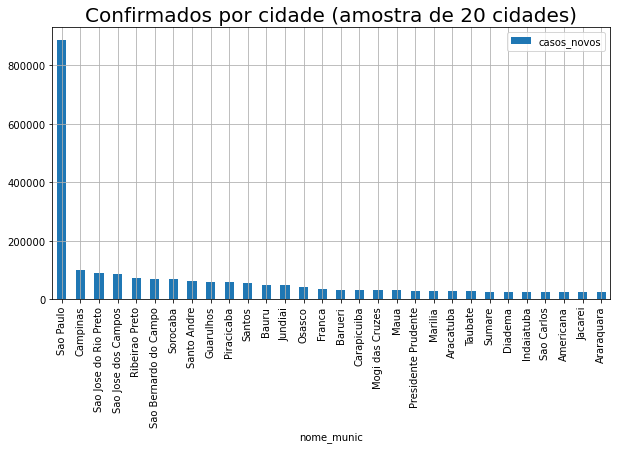

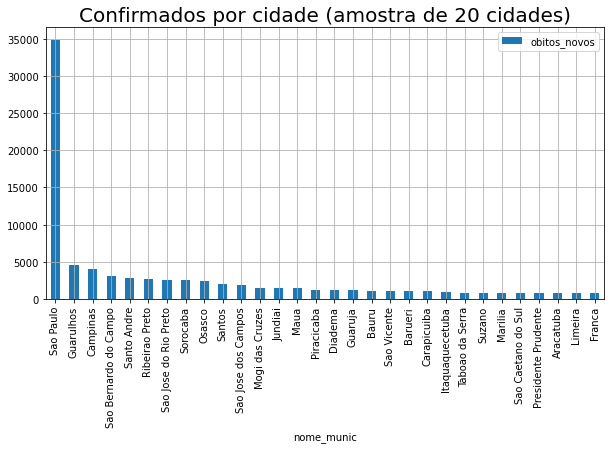

In [15]:
for coluna in dataframe.drop(columns = 'letalidade').columns:
    dataframe[[coluna]].sort_values(coluna, ascending=False)[:30].plot(kind='bar', figsize=(10,5))
    plt.title('Confirmados por cidade (amostra de 20 cidades)', fontsize = 20)
    plt.grid(True)
    plt.show()

In [16]:
df_bauru = df[df["nome_munic"] == "Bauru"]

In [17]:
df_bauru.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
67,Bauru,3506003,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,364225,62416,66768,0,8.0,"-22,3246","-49,0871",9
712,Bauru,3506003,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,364225,62416,66768,0,8.0,"-22,3246","-49,0871",9
1357,Bauru,3506003,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,364225,62416,66768,0,8.0,"-22,3246","-49,0871",9
2002,Bauru,3506003,28,2,2020-02-28,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,364225,62416,66768,0,8.0,"-22,3246","-49,0871",9
2647,Bauru,3506003,29,2,2020-02-29,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Bauru,12,364225,62416,66768,0,8.0,"-22,3246","-49,0871",9


In [18]:
df_bauru['datahora'] = pd.to_datetime(df_bauru['datahora'])

In [19]:
df_bauru['aceleracaoCasos'] = df_bauru['casos_novos'].diff()
df_bauru['aceleracaoObitos'] = df_bauru['obitos_novos'].diff()
df_bauru['mediaCasos'] = df_bauru['casos_novos'].rolling(window = 14, center = False).mean()
df_bauru['mediaObitos'] = df_bauru['obitos_novos'].rolling(window = 14, center = False).mean()

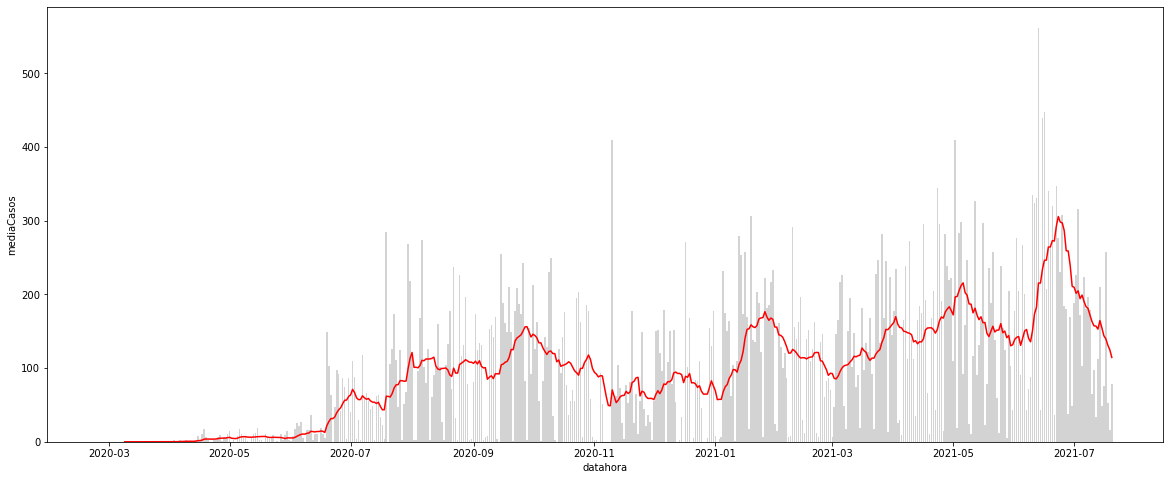

In [20]:
plt.figure(figsize=(20,8))
plt.bar(df_bauru['datahora'], df_bauru['casos_novos'], color = 'lightgrey')
sns.lineplot(y=df_bauru['mediaCasos'], x=df_bauru['datahora'], color = 'red')

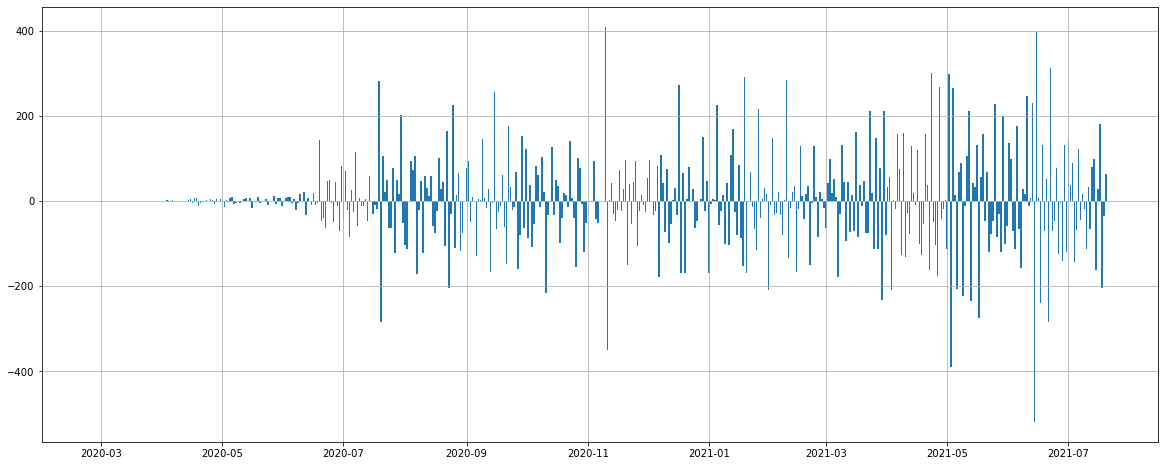

In [21]:
plt.figure(figsize=(20,8))
plt.bar(df_bauru['datahora'], df_bauru['aceleracaoCasos'])
plt.grid(True)

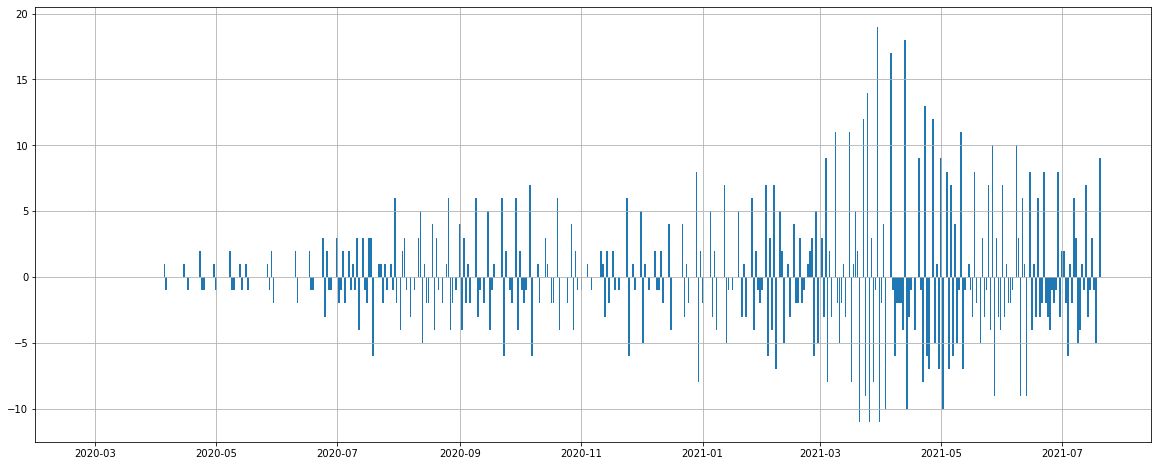

In [22]:
plt.figure(figsize=(20,8))
plt.bar(df_bauru['datahora'], df_bauru['aceleracaoObitos'])
plt.grid(True)

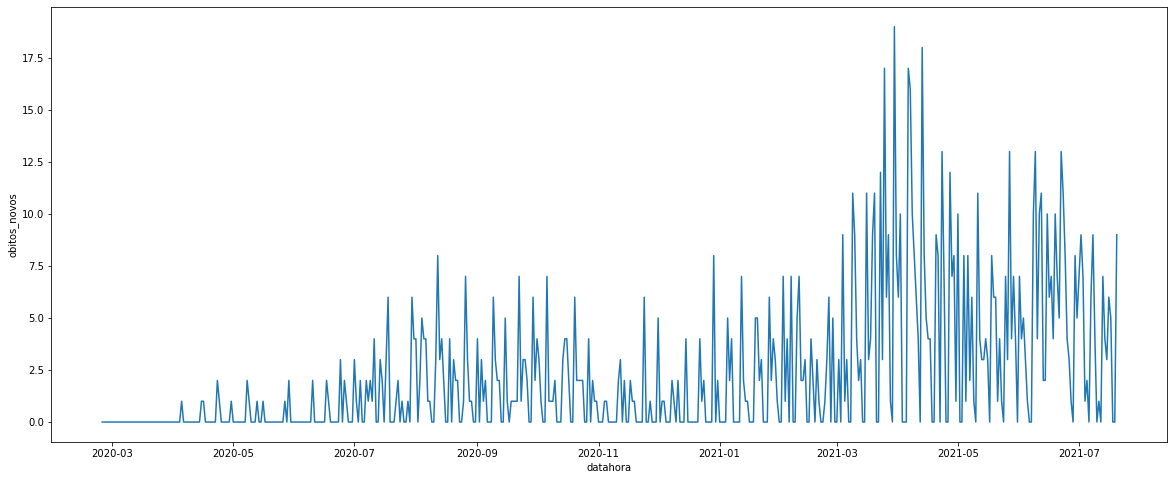

In [23]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(data = df_bauru, x = 'datahora', y='obitos_novos')

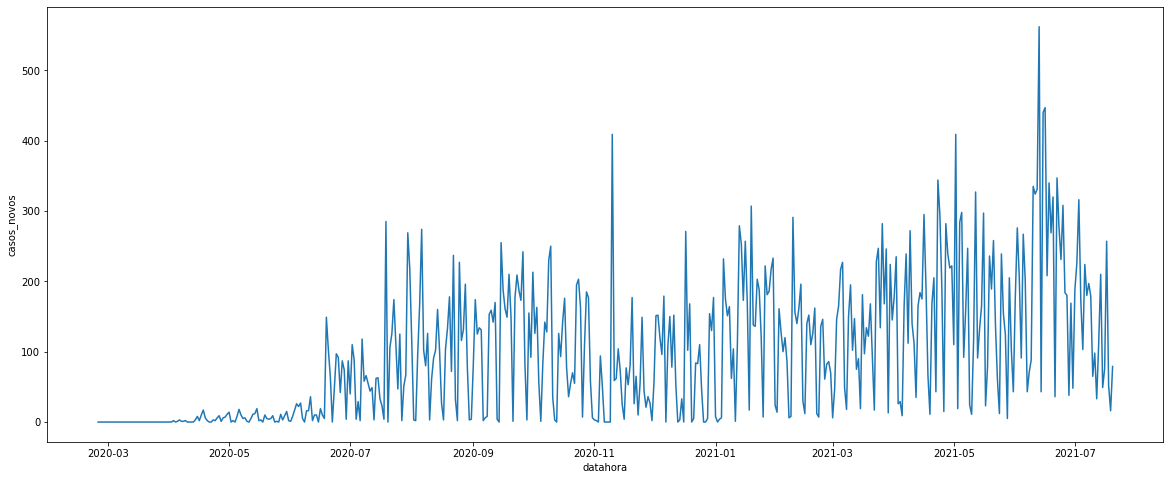

In [24]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(data = df_bauru, x = 'datahora', y='casos_novos')

<BarContainer object of 512 artists>

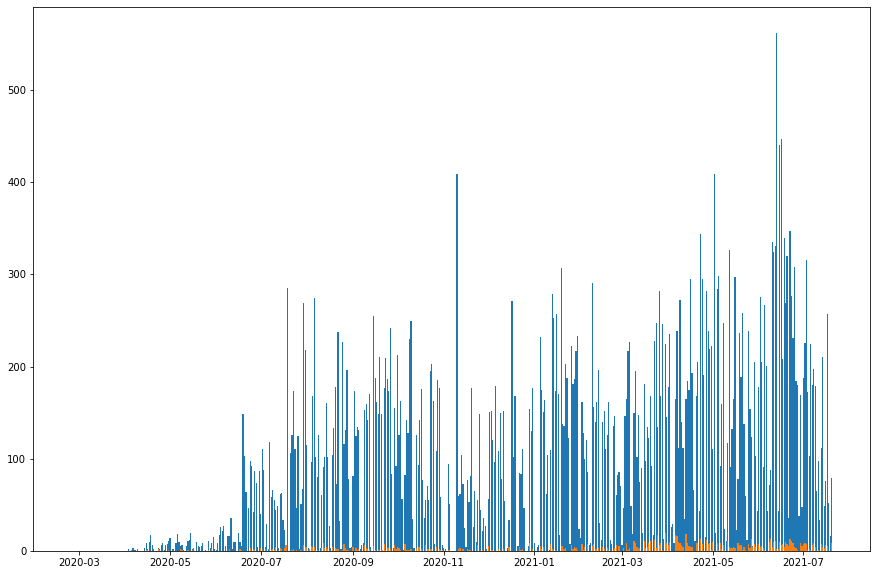

In [75]:
plt.figure(figsize=(15,10))
plt.bar(df_bauru['datahora'], df_bauru['casos_novos'])
plt.bar(df_bauru['datahora'], df_bauru['obitos_novos'])

In [30]:
df_bauru['dia_da_semana'] = df_bauru['datahora'].dt.dayofweek

In [33]:
alterar_dias = {0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: "Quinta", 4: 'Sexta', 5: 'Sabado', 6:'Domingo'}

In [36]:
df_bauru['dia_da_semana'] = df_bauru['dia_da_semana'].replace(alterar_dias)

In [37]:
df_bauru.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,map_leg,map_leg_s,latitude,longitude,semana_epidem,aceleracaoCasos,aceleracaoObitos,mediaCasos,mediaObitos,dia_da_semana
67,Bauru,3506003,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,0,8.0,"-22,3246","-49,0871",9,NaN,NaN,NaN,NaN,Terça
712,Bauru,3506003,26,2,2020-02-26,0,0,"0,00000000000000e+00","0,000000000000000",0,...,0,8.0,"-22,3246","-49,0871",9,0.0,0.0,NaN,NaN,Quarta
1357,Bauru,3506003,27,2,2020-02-27,0,0,"0,00000000000000e+00","0,000000000000000",0,...,0,8.0,"-22,3246","-49,0871",9,0.0,0.0,NaN,NaN,Quinta
2002,Bauru,3506003,28,2,2020-02-28,0,0,"0,00000000000000e+00","0,000000000000000",0,...,0,8.0,"-22,3246","-49,0871",9,0.0,0.0,NaN,NaN,Sexta
2647,Bauru,3506003,29,2,2020-02-29,0,0,"0,00000000000000e+00","0,000000000000000",0,...,0,8.0,"-22,3246","-49,0871",9,0.0,0.0,NaN,NaN,Sabado


In [53]:
casos_agrupados_dia_semana = df_bauru.groupby("dia_da_semana")['casos', 'casos_novos', 'aceleracaoCasos'].mean().round()

In [54]:
casos_agrupados_dia_semana

,casos,casos_novos,aceleracaoCasos
dia_da_semana,,,
Domingo,16536.0,77.0,-34.0
Quarta,16114.0,121.0,6.0
Quinta,16226.0,112.0,-9.0
Sabado,16459.0,111.0,-10.0
Segunda,16546.0,10.0,-67.0
Sexta,16348.0,121.0,9.0
Terça,16437.0,115.0,106.0


In [55]:
casos_agrupados_dia_semana = casos_agrupados_dia_semana.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado'])

In [56]:
casos_agrupados_dia_semana

,casos,casos_novos,aceleracaoCasos
dia_da_semana,,,
Domingo,16536.0,77.0,-34.0
Segunda,16546.0,10.0,-67.0
Terça,16437.0,115.0,106.0
Quarta,16114.0,121.0,6.0
Quinta,16226.0,112.0,-9.0
Sexta,16348.0,121.0,9.0
Sabado,16459.0,111.0,-10.0


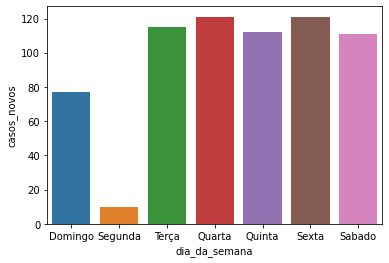

In [57]:
sns.barplot(data=casos_agrupados_dia_semana, x = casos_agrupados_dia_semana.index, y = 'casos_novos')

In [67]:
obitos_agrupados_dia_semana = df_bauru.groupby("dia_da_semana")['obitos', 'obitos_novos', 'aceleracaoObitos'].mean().round(2)

In [68]:
obitos_agrupados_dia_semana

,obitos,obitos_novos,aceleracaoObitos
dia_da_semana,,,
Domingo,328.33,0.38,-1.96
Quarta,320.38,2.84,-1.68
Quinta,323.40,3.01,0.18
Sabado,327.95,2.34,0.14
Segunda,328.49,0.16,-0.22
Sexta,325.60,2.21,-0.81
Terça,328.64,4.58,4.48


In [70]:
obitos_agrupados_dia_semana = obitos_agrupados_dia_semana.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sabado'])

In [71]:
obitos_agrupados_dia_semana

,obitos,obitos_novos,aceleracaoObitos
dia_da_semana,,,
Domingo,328.33,0.38,-1.96
Segunda,328.49,0.16,-0.22
Terça,328.64,4.58,4.48
Quarta,320.38,2.84,-1.68
Quinta,323.40,3.01,0.18
Sexta,325.60,2.21,-0.81
Sabado,327.95,2.34,0.14


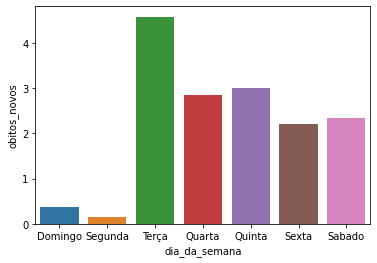

In [72]:
sns.barplot(data=obitos_agrupados_dia_semana, x = obitos_agrupados_dia_semana.index, y = 'obitos_novos')

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [86]:
results_obitos = seasonal_decompose(df_bauru['obitos_novos'], freq = 7)
results_casos = seasonal_decompose(df_bauru['casos_novos'], freq = 7)

In [87]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(12,6))
    plt.plot(y1, color = cor1, label = label1)
    plt.plot(y2, color = cor2, label = label2)
    plt.plot(y3, color = cor3, label = label3)
    plt.legend(fontsize = 18)

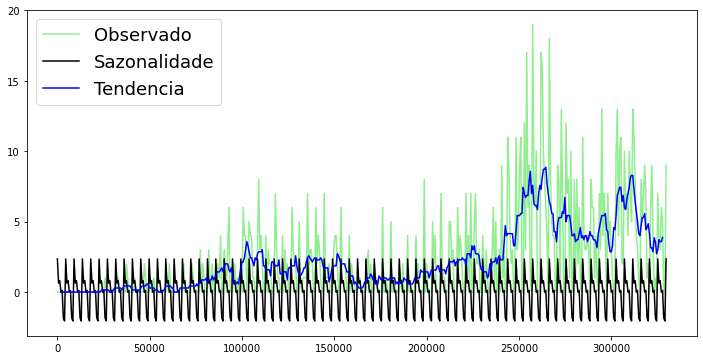

In [88]:
plotar(results_obitos.observed, results_obitos.seasonal, results_obitos.trend, 
       "lightgreen", "black", "blue", "Observado", "Sazonalidade", "Tendencia")

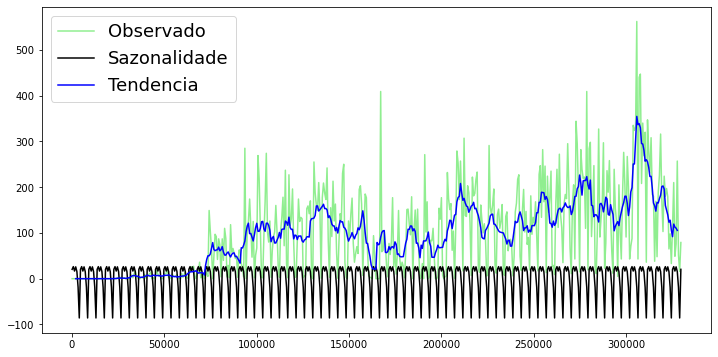

In [89]:
plotar(results_casos.observed, results_casos.seasonal, results_casos.trend, 
       "lightgreen", "black", "blue", "Observado", "Sazonalidade", "Tendencia")